# **LOGISTIC REGRESSION**

We will create a logistic regression class from scratch. We will implement the algorithm using only a minimum number of libraries such as NumPy. Unlike linear regression, there are two estimation methods: the predict method, which outputs the label, and the predict_proba method, which outputs the probability.

In [1]:
import numpy as np

class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    """

    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=False):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.coef_ = None
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _loss(self, y, y_pred):
        # Cross-entropy error
        epsilon = 1e-15  # for numerical stability
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def fit(self, X, y, X_val=None, y_val=None):
        # Considering the bias term
        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
            if X_val is not None:
                X_val = np.c_[np.ones(X_val.shape[0]), X_val]

        # Parameter Initialization
        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.iter):
            z = np.dot(X, self.coef_)
            y_pred = self._sigmoid(z)

            # Gradient descent
            gradient = np.dot(X.T, (y_pred - y)) / y.shape[0]
            self.coef_ -= self.lr * gradient

            # Loss calculation
            self.loss[i] = self._loss(y, y_pred)

            # If validation data is available, validation loss is also recorded.
            if X_val is not None and y_val is not None:
                y_val_pred = self._sigmoid(np.dot(X_val, self.coef_))
                self.val_loss[i] = self._loss(y_val, y_val_pred)

            # verbose Output
            if self.verbose and (i % 100 == 0 or i == self.iter - 1):
                print(f"Iteration {i+1}/{self.iter} - Loss: {self.loss[i]:.4f}", end='')
                if X_val is not None:
                    print(f" - Val Loss: {self.val_loss[i]:.4f}")
                else:
                    print()

    def predict_proba(self, X):
        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
        return self._sigmoid(np.dot(X, self.coef_)).reshape(-1, 1)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


# Problem 1: Assumption function
Implement the logistic regression assumption function method in the ScratchLogisticRegression class.

The logistic regression function is the linear regression function passed through the sigmoid function , which is expressed as follows:

g
(
z
)=
1
1
+
e
−
z
The assumed function for linear regression was:

h
θ
(
x
)=
θ
T
⋅
x
Put together, the logistic regression assumptions are:

h
θ
(
x
)=
1
1
+
e
−
θ
T
⋅
x
$x$ : feature vector

$\theta$ : Parameter (weight) vector

In [2]:
import numpy as np

class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=False, lam=0.0):
        """
        Parameters
        ----------
        num_iter : int
            Number of gradient‐descent iterations
        lr : float
            Learning rate α
        bias : bool
            If True, fit an intercept term
        verbose : bool
            If True, print loss every 100 iters
        lam : float
            L2 regularization strength λ
        """
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam

        # Will be initialized in fit()
        self.coef_ = None      # θ vector, shape (n_features [+1],)
        self.loss = None       # training loss per iteration
        self.val_loss = None   # validation loss per iteration (if used)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _logistic_hypothesis(self, X):
        # hθ(x) = sigmoid(X · θ)
        return self._sigmoid(X.dot(self.coef_))

# Problem 2: Gradient descent method
We will implement training using the gradient descent method. Add the _gradient_descent method for updating the parameters expressed by the following formula, and call it from the fit method.

$$θj​:=θj​−α⋅\frac{∂J(θ)}{∂θ_j}$$
$$\frac{∂J(θ)}{∂θ_0} = \frac{1}{m}\sum_{i=1}^{m}(hθ​(x^i)−y^i)x^i_j,j=0$$
$$\frac{∂J(θ)}{∂θ_0} = (\frac{1}{m}\sum_{i=1}^{m}(hθ​(x^i)−y^i)x^i_j)+\frac{\lambda}{m}|theta_j,j>=0$$

　

$\alpha$ : learning rate

$i$ : sample index

$j$ : Feature index

$m$ : number of input data

$h_\theta()$ : Assumption function

$x$ : feature vector

$\theta$ : Parameter (weight) vector

$x^{(i)}$ : feature vector of the i-th sample

$y^{(i)}$ : the correct label for the i-th sample

$\theta_j$ : jth parameter (weight)

$λ$ : Regularization parameter

The above formula includes a regularization term. The regularization term is used to prevent overfitting. The intercept, $\theta_0$, is not included in the regularization term so that the coefficients for the features, excluding the intercept, can be discussed from the same perspective.

In [3]:
def _gradient_descent(self, X, y):
    """
    Update self.coef_ using one step of gradient descent.
    """
    m = X.shape[0]
    h = self._logistic_hypothesis(X)  # shape (m,)
    grad = (X.T.dot(h - y) / m)       # shape (n_features,)
    # regularize all but θ_0
    reg = np.concatenate([[0], self.lam/m * self.coef_[1:]])
    self.coef_ -= self.lr * (grad + reg)

In [4]:
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Train via gradient descent, record train/val loss.
        """
        # Add bias column if requested
        if self.bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

        # Initialize parameters and loss records
        n_features = X.shape[1]
        self.coef_ = np.zeros(n_features)
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter) if X_val is not None else None

        for i in range(self.num_iter):
            self._gradient_descent(X, y)
            self.loss[i] = self._loss_function(X, y)

            if X_val is not None and y_val is not None:
                self.val_loss[i] = self._loss_function(X_val, y_val)

            if self.verbose and i % 100 == 0:
                msg = f"iter {i:4d} — train_loss: {self.loss[i]:.4f}"
                if self.val_loss is not None:
                    msg += f", val_loss: {self.val_loss[i]:.4f}"
                print(msg)


# Problem 3: Estimation
We implement the estimation mechanism. Add it to the predict and predict_proba methods included in the ScratchLogisticRegression class template.

The output of the hypothesis function $h_\theta(x)$ is the return value of predict_proba, and a threshold is set on that value, labelling it as 1 or 0, which becomes the return value of predict.

In [5]:
def predict_proba(self, X):
    if self.bias == True:
        a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack([a, X])
    pred = self._logistic_hypothesis(X)
    return pred

In [6]:
def predict(self, X):
    if self.bias == True:
        a = np.ones(X.shape[0]).reshape(X.shape[0], 1)
        X = np.hstack([a, X])
    return np.where(self._logistic_hypothesis(X) >= 0.5, 1, 0)

# Problem 4: Objective function
We implement the objective function (loss function) for logistic regression expressed by the following formula . And self.lossrecord this self.val_lossin .

This formula includes a regularization term.

$$J(θ) = \frac{1}{m}\sum_{i=1}^{m}[-y^ilog(hθ​(x^i)−(1-y^i)log(1 - hθ​(x^i)]+\frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$$

$m$ : number of input data

$h_\theta()$ : Assumption function

$x$ : feature vector

$\theta$ : Parameter (weight) vector

$x^{(i)}$ : feature vector of the i-th sample

$y^{(i)}$ : the correct label for the i-th sample

In [7]:
def _loss_func(self, pred, y):
    error = 0
    for i in range(y.shape[0]):
        error += -np.sum(y[i] *  np.log(pred[i])+(1-y[i]) *  np.log(1-pred[i]))
    loss = error / (y.shape[0])
    loss = loss + np.sum(self.theta**2)*self.lam/(2 * y.shape[0])
    return loss

In [8]:
    def _loss_function(self, X, y):
        """
        J(θ) = CE loss + (λ / (2m)) * sum_{j=1}^n θ_j^2
        (bias θ_0 is not regularized)
        """
        m = len(y)
        h = self._logistic_hypothesis(X)
        # avoid log(0)
        h = np.clip(h, 1e-10, 1 - 1e-10)
        ce = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
        reg = (self.lam / (2 * m)) * np.sum(self.coef_[1:]**2)
        return ce + reg

In [9]:
# Updating the fit()
import numpy as np

class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=False, lam=0.0):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam
        self.coef_ = None
        self.loss = None
        self.val_loss = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _logistic_hypothesis(self, X):
        return self._sigmoid(X.dot(self.coef_))

    def _loss_function(self, X, y):
        m = len(y)
        h = np.clip(self._logistic_hypothesis(X), 1e-10, 1 - 1e-10)
        ce = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
        reg = (self.lam/(2*m)) * np.sum(self.coef_[1:]**2)
        return ce + reg

    def _gradient_descent(self, X, y):
        m = X.shape[0]
        h = self._logistic_hypothesis(X)
        grad = X.T.dot(h - y) / m
        reg = np.concatenate([[0], (self.lam/m)*self.coef_[1:]])
        self.coef_ -= self.lr * (grad + reg)

    def fit(self, X, y, X_val=None, y_val=None):
        # — Add bias column if requested
        if self.bias:
            X = np.hstack([np.ones((X.shape[0],1)), X])
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0],1)), X_val])

        # — Initialize
        self.coef_ = np.zeros(X.shape[1])
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter) if X_val is not None else None

        for i in range(self.num_iter):
            self._gradient_descent(X, y)
            self.loss[i] = self._loss_function(X, y)
            if self.val_loss is not None:
                self.val_loss[i] = self._loss_function(X_val, y_val)
            if self.verbose and i % 100 == 0:
                msg = f"iter {i:4d} — train_loss: {self.loss[i]:.4f}"
                if self.val_loss is not None:
                    msg += f", val_loss: {self.val_loss[i]:.4f}"
                print(msg)

# Problem 5: Learning and estimation
Train and infer a Scratch implementation for the binary classification of virgicolor and virginica in the iris dataset prepared in the Introduction to Machine Learning Scratch Sprint.

- check that it works correctly by comparing it with the implementation by scikit-learn.

- use scikit-learn for metrics such as Accuracy, Precision, and Recall.

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Scratch implementation
class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=False, lam=0.0):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam
        self.coef_ = None
        self.loss = None
        self.val_loss = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _logistic_hypothesis(self, X):
        return self._sigmoid(X.dot(self.coef_))

    def _loss_function(self, X, y):
        m = len(y)
        h = np.clip(self._logistic_hypothesis(X), 1e-10, 1 - 1e-10)
        ce = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
        reg = (self.lam / (2 * m)) * np.sum(self.coef_[1:]**2)
        return ce + reg

    def _gradient_descent(self, X, y):
        m = X.shape[0]
        h = self._logistic_hypothesis(X)
        grad = X.T.dot(h - y) / m
        reg = np.concatenate([[0], (self.lam/m)*self.coef_[1:]])
        self.coef_ -= self.lr * (grad + reg)

    def fit(self, X, y, X_val=None, y_val=None):
        if self.bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
        self.coef_ = np.zeros(X.shape[1])
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter) if X_val is not None else None
        for i in range(self.num_iter):
            self._gradient_descent(X, y)
            self.loss[i] = self._loss_function(X, y)
            if self.val_loss is not None:
                self.val_loss[i] = self._loss_function(X_val, y_val)
            if self.verbose and i % 100 == 0:
                msg = f"iter {i:4d} — train_loss: {self.loss[i]:.4f}"
                if self.val_loss is not None:
                    msg += f", val_loss: {self.val_loss[i]:.4f}"
                print(msg)

    def predict_proba(self, X):
        if self.bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self._logistic_hypothesis(X)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    def predict_proba_full(self, X):
        p1 = self.predict_proba(X).reshape(-1, 1)
        return np.hstack([p1, 1 - p1])

In [11]:
# Load Iris and subset to Versicolor and Virginica
iris = load_iris()
X = iris.data
y = iris.target
mask = (y == 1) | (y == 2)  # versicolor=1, virginica=2
X = X[mask]
y = y[mask]
y = (y == 2).astype(int)  # virginica -> 1, versicolor -> 0

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [12]:
# Scratch model training
slr = ScratchLogisticRegression(num_iter=2000, lr=0.1, bias=True, verbose=True,lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)
y_pred_scratch = slr.predict(X_test)

# sklearn logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_sklearn = clf.predict(X_test)
y_pred_sklearn

iter    0 — train_loss: 0.6886, val_loss: 0.6896
iter  100 — train_loss: 0.4312, val_loss: 0.4607
iter  200 — train_loss: 0.3302, val_loss: 0.3739
iter  300 — train_loss: 0.2788, val_loss: 0.3332
iter  400 — train_loss: 0.2481, val_loss: 0.3118
iter  500 — train_loss: 0.2278, val_loss: 0.2999
iter  600 — train_loss: 0.2135, val_loss: 0.2931
iter  700 — train_loss: 0.2029, val_loss: 0.2894
iter  800 — train_loss: 0.1948, val_loss: 0.2876
iter  900 — train_loss: 0.1884, val_loss: 0.2870
iter 1000 — train_loss: 0.1832, val_loss: 0.2872
iter 1100 — train_loss: 0.1790, val_loss: 0.2879
iter 1200 — train_loss: 0.1754, val_loss: 0.2890
iter 1300 — train_loss: 0.1724, val_loss: 0.2903
iter 1400 — train_loss: 0.1698, val_loss: 0.2918
iter 1500 — train_loss: 0.1676, val_loss: 0.2933
iter 1600 — train_loss: 0.1657, val_loss: 0.2949
iter 1700 — train_loss: 0.1640, val_loss: 0.2965
iter 1800 — train_loss: 0.1625, val_loss: 0.2981
iter 1900 — train_loss: 0.1612, val_loss: 0.2997


array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [13]:
# Compute metrics
results = []
for name, y_pred in [("Scratch", y_pred_scratch), ("sklearn", y_pred_sklearn)]:
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })

df_results = pd.DataFrame(results)

# Print comparison table
print(df_results.to_string(index=False))

  Model  Accuracy  Precision  Recall
Scratch       0.9   0.833333     1.0
sklearn       0.9   1.000000     0.8


Overall accuracy is identical demonstrating that scratch implementation is sound. The precision and recall trade-off differs.

# Problem 6: Plotting the learning curve
Looking at the learning curve and we see that the losses are dropping appropriately.

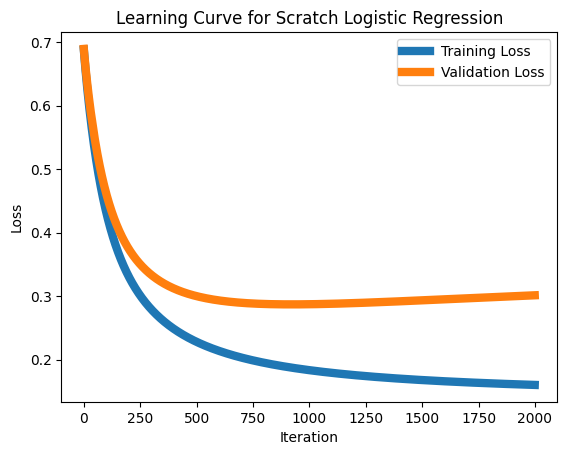

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(slr.loss, linewidth=6, label='Training Loss')
plt.plot(slr.val_loss, linewidth=6, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning Curve for Scratch Logistic Regression')
plt.legend()

# Problem 7: Visualization of decision regions
Visualize the decision area. The following is a reference diagram. It is plotted on the horizontal sepal widthand vertical axes . <a href=https://t.gyazo.com/teams/diveintocode/aafff9ec9c965ab15ceebde563eead22.png><img src=https://t.gyazo.com/teams/diveintocode/aafff9ec9c965ab15ceebde563eead22.png alt=”Image from Gyazo” width=”400”/></a>petal length

Since there are four explanatory variables, it is not possible to depict the decision region in two dimensions.

np.meshgridThis can be implemented by using a model trained with only two features for drawing, or by using a function to draw the decision region .

It is easier to train and draw using only two features, so I recommend that.

iter    0 — train_loss: 0.6930, val_loss: 0.6932
iter  100 — train_loss: 0.6832, val_loss: 0.6977
iter  200 — train_loss: 0.6766, val_loss: 0.6956
iter  300 — train_loss: 0.6704, val_loss: 0.6906
iter  400 — train_loss: 0.6644, val_loss: 0.6845
iter  500 — train_loss: 0.6585, val_loss: 0.6780
iter  600 — train_loss: 0.6527, val_loss: 0.6715
iter  700 — train_loss: 0.6470, val_loss: 0.6651
iter  800 — train_loss: 0.6414, val_loss: 0.6588
iter  900 — train_loss: 0.6359, val_loss: 0.6525
iter 1000 — train_loss: 0.6304, val_loss: 0.6463
iter 1100 — train_loss: 0.6250, val_loss: 0.6403
iter 1200 — train_loss: 0.6198, val_loss: 0.6343
iter 1300 — train_loss: 0.6145, val_loss: 0.6285
iter 1400 — train_loss: 0.6094, val_loss: 0.6227
iter 1500 — train_loss: 0.6044, val_loss: 0.6171
iter 1600 — train_loss: 0.5994, val_loss: 0.6115
iter 1700 — train_loss: 0.5945, val_loss: 0.6060
iter 1800 — train_loss: 0.5897, val_loss: 0.6006
iter 1900 — train_loss: 0.5850, val_loss: 0.5953


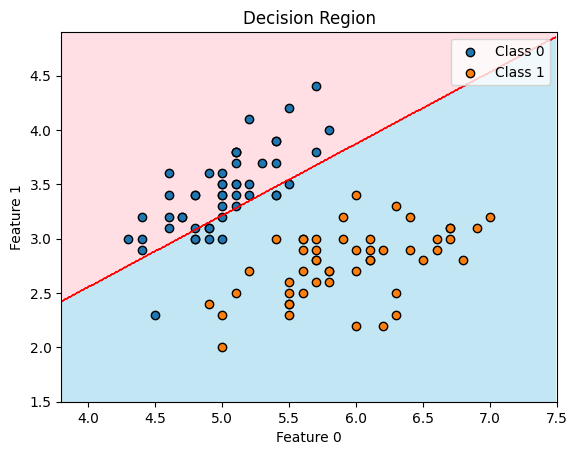

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data: first 100 samples, first two features (setosa vs. versicolor)
iris = load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train scratch logistic regression
slr = ScratchLogisticRegression(num_iter=2000, lr=0.001, bias=True, verbose=True, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

def decision_region(X, y, slr, padding=0.5, step=0.01):
    # Compute min/max with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding

    # Create meshgrid over the extended range
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )
    mesh = np.c_[mesh_f0.ravel(), mesh_f1.ravel()]

    # Predict and reshape
    y_pred = slr.predict(mesh).reshape(mesh_f0.shape)

    # Plot
    plt.figure()
    plt.title('Decision Region')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')

    # Fill regions and boundary
    plt.contourf(mesh_f0, mesh_f1, y_pred, 
                 cmap=ListedColormap(['pink', 'skyblue']), alpha=0.5)
    plt.contour(mesh_f0, mesh_f1, y_pred, colors='red', linewidths=0.5)

    # Scatter points
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', edgecolor='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', edgecolor='k')

    # Explicitly set limits to match mesh
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.legend()
    plt.show()

# Plot decision region on the entire dataset
decision_region(X, y, slr)

# Problem 8: (Advanced) Preserving weights
To make it easier to verify, let's make it possible to save and load the learned weights. We can use the pickle module or NumPy's np.savez.

In [16]:
# Adding to the ScratchLogisticRegression class
# Save method
class ScratchLogisticRegression:
    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=False, lam=0.0):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam
        self.coef_ = None
        self.loss = None
        self.val_loss = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _logistic_hypothesis(self, X):
        return self._sigmoid(X.dot(self.coef_))

    def save_weights(self, filepath="weights.npz"):
        """
        Save the learned weights to a file using numpy.
        """
        if self.coef_ is not None:
            np.savez(filepath, coef=self.coef_)
            print(f"Weights saved to {filepath}")
        else:
            print("No weights to save.")

    def load_weights(self, filepath="weights.npz"):
        """
        Load the learned weights from a file using numpy.
        """
        data = np.load(filepath)
        self.coef_ = data['coef']
        print(f"Weights loaded from {filepath}")

    def _loss_function(self, X, y):
        m = len(y)
        h = np.clip(self._logistic_hypothesis(X), 1e-10, 1 - 1e-10)
        ce = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
        reg = (self.lam / (2 * m)) * np.sum(self.coef_[1:]**2)
        return ce + reg
    def _gradient_descent(self, X, y):
        m = X.shape[0]
        h = self._logistic_hypothesis(X)
        grad = X.T.dot(h - y) / m
        reg = np.concatenate([[0], (self.lam/m)*self.coef_[1:]])
        self.coef_ -= self.lr * (grad + reg)

    def fit(self, X, y, X_val=None, y_val=None):
        if self.bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
        self.coef_ = np.zeros(X.shape[1])
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter) if X_val is not None else None
        for i in range(self.num_iter):
            self._gradient_descent(X, y)
            self.loss[i] = self._loss_function(X, y)
            if self.val_loss is not None:
                self.val_loss[i] = self._loss_function(X_val, y_val)
            if self.verbose and i % 100 == 0:
                msg = f"iter {i:4d} — train_loss: {self.loss[i]:.4f}"
                if self.val_loss is not None:
                    msg += f", val_loss: {self.val_loss[i]:.4f}"
                print(msg)



In [17]:
slr = ScratchLogisticRegression()
slr.fit(X_train, y_train, X_test, y_test)
slr.save_weights("logreg_weights.npz")

# Later or elsewhere
slr2 = ScratchLogisticRegression()
slr2.load_weights("logreg_weights.npz")

Weights saved to logreg_weights.npz
Weights loaded from logreg_weights.npz
